## Logistic Regression Classification with Titanic Dataset (Seaborn Dataset)

In [159]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [160]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [161]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

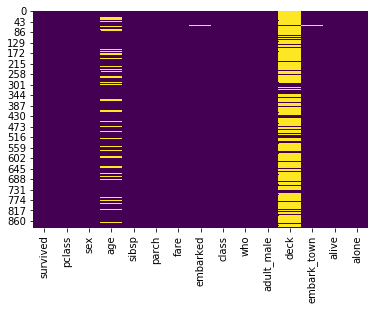

In [163]:
# relationship between target and columns with missing values

sns.heatmap(df.isna(), cbar = False, cmap='viridis');

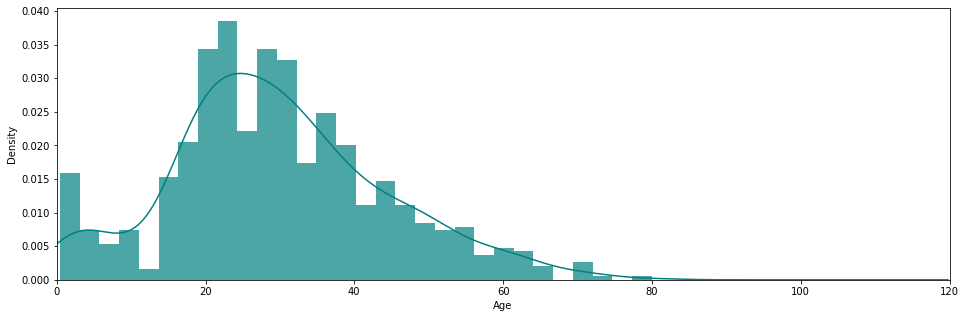

In [164]:
ax = df['age'].hist(bins=30, density = True, stacked=True, color='teal', alpha=0.7, figsize=(16,5))
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.set_xlim([0,120])
df.age.plot(kind='density', color='teal');

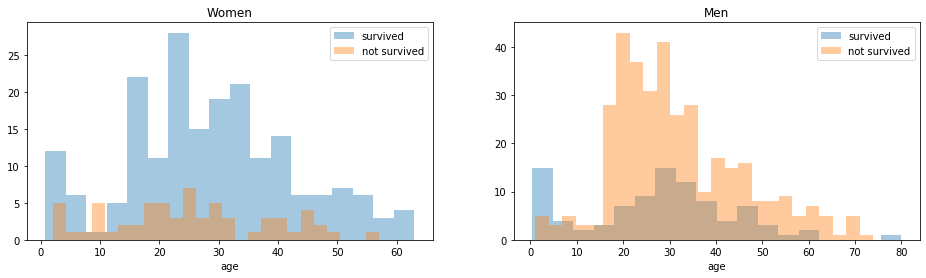

In [165]:
# compare men and women who survived and did not

survived = 'survived'
not_survived = 'not survived'

women = df[df['sex'] == 'female']
men = df[df['sex'] == 'male']

fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.distplot(women[women[survived] == 1].age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
sns.distplot(women[women[survived] == 0].age.dropna(), bins=25, label=not_survived, ax=axes[0], kde=False)
axes[0].legend()
axes[0].set_title('Women');

sns.distplot(men[men[survived] == 1].age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
sns.distplot(men[men[survived] == 0].age.dropna(), bins=25, label=not_survived, ax=axes[1], kde=False)
axes[1].legend()
axes[1].set_title('Men');

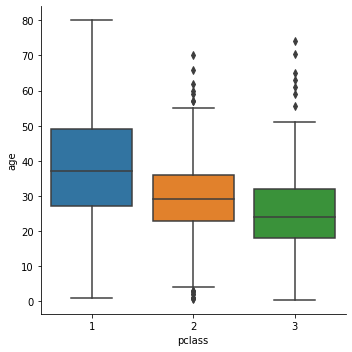

In [166]:
# check relationship between class and age 

sns.catplot(x = 'pclass', y='age', data=df, kind='box');

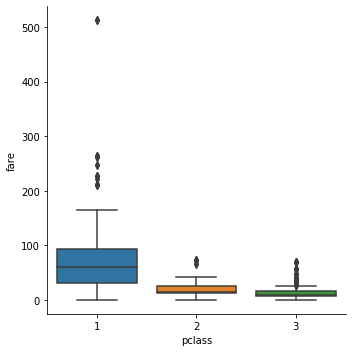

In [167]:
# check relationship between class and fare 

sns.catplot(x='pclass', y='fare', data=df, kind='box');

In [168]:
# define function to replace null value with mean age of each class

def replace_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return df[df['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return df[df['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return df[df['pclass'] == 3]['age'].mean()
        
    else:
        return age
        

In [169]:
df['age'] = df[['age', 'pclass']].apply(replace_age, axis=1)

In [170]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

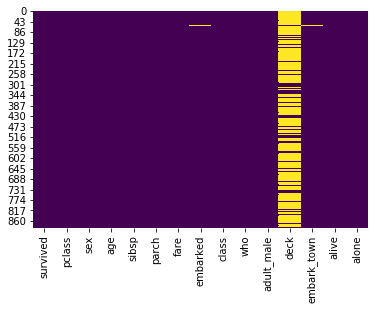

In [171]:
sns.heatmap(df.isna(), cbar = False, cmap='viridis');

## 'Embarked' Analysis 

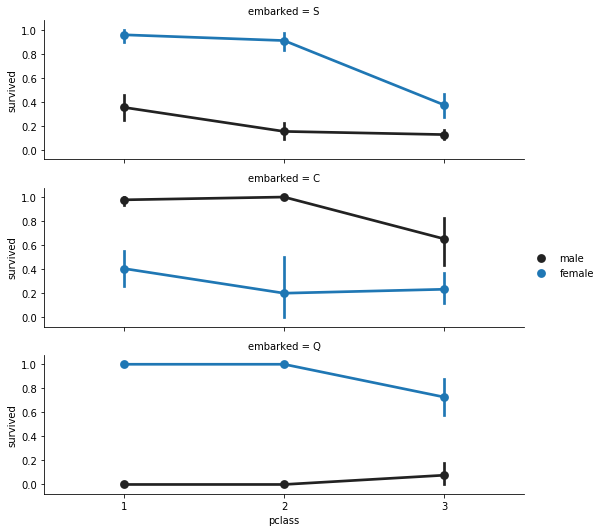

In [172]:
f = sns.FacetGrid(df, row='embarked', height=2.5, aspect=3)
f.map(sns.pointplot,'pclass','survived','sex', order=None, hue_order=None)
f.add_legend();

In [173]:
# replace null values in embark and embark_town column with highest count value 

df['embarked'].value_counts()

common_value = 'S'

df['embarked'].fillna(value=common_value, inplace=True)
df['embark_town'].fillna(value=common_value, inplace=True)

df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [174]:
# drop unwanted columns like deck, embark_town and alive 

df.drop(labels=['deck','embark_town','alive'], inplace=True, axis=1)

In [175]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

## Feature Transformation

In [176]:
# change float variable columns into int 

df['fare'] = df['fare'].astype('int')
df['age'] = df['age'].astype('int')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22,1,0,7,S,Third,man,True,False
1,1,1,female,38,1,0,71,C,First,woman,False,False
2,1,3,female,26,0,0,7,S,Third,woman,False,True
3,1,1,female,35,1,0,53,S,First,woman,False,False
4,0,3,male,35,0,0,8,S,Third,man,True,True


In [177]:
# convert categorical values into numeric  
# first gender {'male':0, 'female':1}

gender = {'male':0, 'female':1}
df['sex'] = df['sex'].map(gender)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True


In [178]:
df['who'].unique()

# next who column 
who = {'man':0, 'woman':1, 'child':2}
df['who'] = df['who'].map(who)

In [179]:
# next adult_male column  
adult_male = {True:1, False:0}
df['adult_male'] = df['adult_male'].map(adult_male)

In [180]:
# next alone column
alone = {True:1, False:0}
df['alone'] = df['alone'].map(alone)

In [181]:
ports = {'S':0, 'C':1, 'Q':2}
df['embarked'] = df['embarked'].map(ports)

In [182]:
pclass = {'First':0, 'Second':1, 'Third':2}
df['class'] = df['class'].map(pclass)

In [183]:
# drop unwanted class 

df.drop(labels=['class','who'], inplace=True, axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


## Build Logistic Regression Model

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [190]:
X = df.iloc[:,1:]
y = df[['survived']]

In [191]:
# train test split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [194]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [195]:
model.score(X_test, y_test)

0.8271186440677966